<a href="https://colab.research.google.com/github/Ash100/Documents/blob/main/Plot_your_data_on_Plotnine_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Plotting with Plotnine
This notebook is compiled by **Dr. Ashfaq Ahmad**. It intends the creation of biplots figures or simple plots (Line and Histograms). I particularly test them on RMSD.dat and RoG obtained in Molecular dynamics simulations files. How to use this notebook? Please watch a video tutorial "Plotline Plots via Jupyter Notebook" on https://www.youtube.com/@Bioinformaticsinsights

Best Regards,


In [ ]:
#Install Plotnine
!pip install pandas plotnine

In [ ]:
import warnings
warnings.filterwarnings('ignore')


**Important**. Incase you want to load data from Google Drive. Incase of a direct upload, you do not need to import Google Drive. Therefore, do not run the below cell.

In [ ]:
#Import google modules:
from google.colab import drive
drive.mount('/content/drive')

##RMSD / RMSF Data or Line Plot
You are allowed to increase or decrease the inline options as per your needs. The inline options are for three files, if you have more than three, you need to increase otherwise disable one line if two.

In [126]:
import numpy as np
import pandas as pd
from plotnine import *

%matplotlib inline
rmsf1 = pd.read_csv('/content/3wa4c_rmsf_ca.csv', encoding='latin1').dropna()
rmsf2 = pd.read_csv('/content/3wa4_rmsf_ca.csv', encoding='latin1').dropna()

In [127]:
# Add a 'Group' column to each DataFrame to differentiate them
rmsf1['Sample'] = 'hGrb2'
rmsf2['Sample'] = 'hGrb2-549821'

In [128]:
# Define custom colors for each receptor
custom_colors = {'hGrb2': 'blue', 'hGrb2-549821': 'orange'}

In [129]:
# Concatenate the three DataFrames into one
combined_data = pd.concat([rmsf1, rmsf2])

In [130]:
print(combined_data.columns)

Index(['Residue Index', 'RMSF (Å)', 'Sample'], dtype='object')


To plot your data, please run the below cell. Remember you need to edit the X and Y label for your plot.

In [67]:
#Generate horitontal line graph for RMSD data
p = ggplot(combined_data, aes(x='Time (ns) ', y='Distance (Å)', color='Sample')) + geom_line(size=1.5) + scale_color_manual(values=custom_colors) + theme_minimal() + theme(figure_size=(6, 3), panel_background=element_rect(fill='white'), panel_grid_major=element_blank(), panel_grid_minor=element_blank(), axis_line=element_line(color='black'), panel_border=element_blank()) + xlim(18, combined_data['Time (ns)'].max() + 10)

**For RMSD with correct time (ns) slots**

In [93]:
from plotnine import *

p = (
    ggplot(combined_data, aes(x='Time (ns)', y='RMSD (Å)', color='Sample')) +
    geom_line(size=1.0) +
    scale_color_manual(values=custom_colors) +

    # Format X-axis: break every 200, but label as ns (divide by 10)
    scale_x_continuous(
        breaks=[200, 400, 600, 800, 1000],
        labels=[20, 40, 60, 80, 100]
    ) +

    theme_minimal() +
    theme(
        figure_size=(6, 3),
        panel_background=element_rect(fill='white'),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        axis_line=element_line(color='black'),
        panel_border=element_blank()
    ) +
    labs(x='Time (ns)', y='RMSD (Å)')
)

p.draw()

#Save your plot
p.save(filename='3aw4_RMSD.png', height=3, width=6, units='in', dpi=1200)

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: 3aw4_RMSD.png


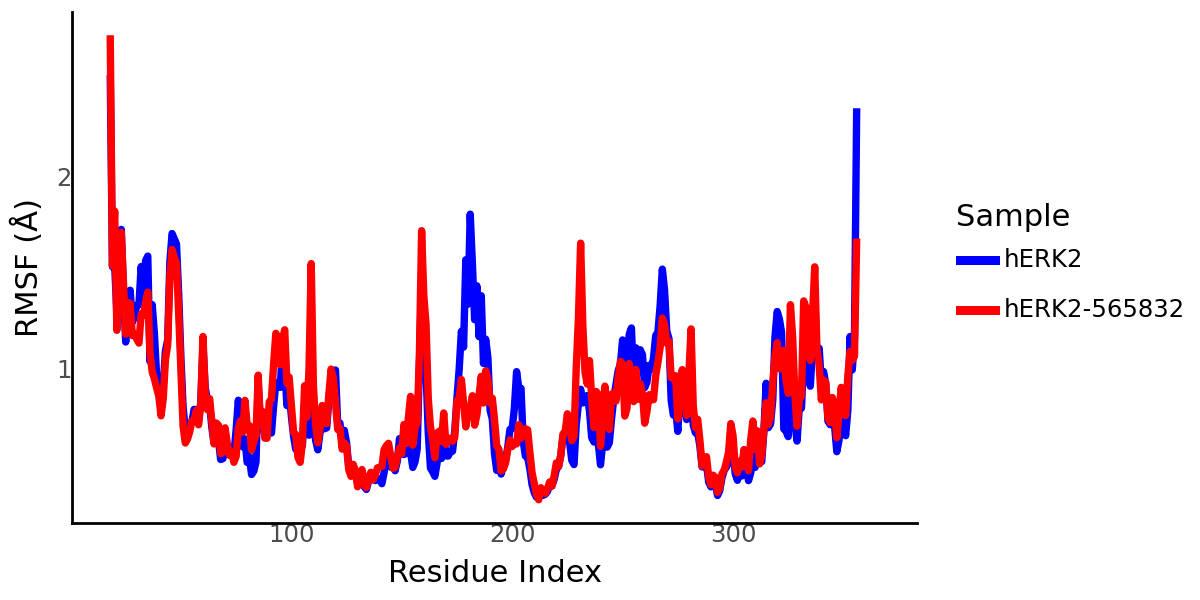

In [24]:
display(p)

In [ ]:
#Save your plot
p.save(filename='Distance.png', height=3, width=6, units='in', dpi=1200)

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: Distance.png
/usr/local/lib/python3.11/dist-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 321 rows containing missing values.


## For offset RMSF - As below

In [131]:
# Check unique values in 'Complex' to verify no NaNs or bad data
print("Unique Complex values:", combined_data['Sample'].unique())
print("First few rows of data:")
print(combined_data.head())

# Confirm data types
print("\nData types:")
print(combined_data.dtypes)

# Step 1: Create offset map
offset_map = {
    name: i * 2.5  # vertical offset
    for i, name in enumerate(combined_data['Sample'].unique())
}
print("\nOffset map:", offset_map)

# Step 2: Safely create RMSF_offset column
def add_offset(row):
    try:
        return row['RMSF (Å)'] + offset_map[row['Sample']]
    except Exception as e:
        print(f"Error on row {row.name}: {e}")
        return None

combined_data['RMSF_offset'] = combined_data.apply(add_offset, axis=1)

# Step 3: Confirm creation
print("\nNew DataFrame preview:")
print(combined_data[['Residue Index', 'RMSF (Å)', 'Sample', 'RMSF_offset']].head())

Unique Complex values: ['hGrb2' 'hGrb2-549821']
First few rows of data:
   Residue Index  RMSF (Å) Sample
0             57  6.137956  hGrb2
1             58  4.256993  hGrb2
2             59  2.404741  hGrb2
3             60  1.067290  hGrb2
4             61  0.818043  hGrb2

Data types:
Residue Index      int64
RMSF (Å)         float64
Sample            object
dtype: object

Offset map: {'hGrb2': 0.0, 'hGrb2-549821': 2.5}

New DataFrame preview:
   Residue Index  RMSF (Å) Sample  RMSF_offset
0             57  6.137956  hGrb2     6.137956
1             58  4.256993  hGrb2     4.256993
2             59  2.404741  hGrb2     2.404741
3             60  1.067290  hGrb2     1.067290
4             61  0.818043  hGrb2     0.818043


In [108]:
print("Columns:", list(combined_data.columns))

Columns: ['Residue Index', 'RMSF (Å)', 'Sample', 'RMSF_offset']


In [132]:
from plotnine import *

custom_colors = {
    name: color for name, color in zip(
        combined_data['Sample'].unique(),
        ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    )
}

p = (
    ggplot(combined_data, aes(x='Residue Index', y='RMSF_offset', color='Sample')) +
    geom_line(size=1.2) +
    scale_color_manual(values=custom_colors) +
    theme_minimal() +
    theme(
        figure_size=(8, 4),
        panel_background=element_rect(fill='white'),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        axis_line=element_line(color='black'),
        panel_border=element_blank()
    ) +
    labs(y='RMSF (Å)', x='Residue Index') +
    xlim(57, combined_data['Residue Index'].max() + 5)
)

p.draw()  # or print(p)
# Save the plot to a high-resolution PNG file (600 DPI)
p.save("rmsf_offset_plot.png", dpi=1200, width=8, height=4, units='in')

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 4 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: rmsf_offset_plot.png


For shadded regions - change residue location below

The following code starts from Residue **18**. Change 18 to the actual starting residue position you want in **xlim**. <br>
Also the below script entertain two area to be shadded. manage them accordingly.

In [134]:
from plotnine import *
import pandas as pd

# ✅ Set exact colors for each sample
custom_colors = {
    'hGrb2': '#1f77b4',           # blue
    'hGrb2-549821': '#ff7f0e'     # orange
}

# No offset — plot raw RMSF (Å) values
ymin_real = combined_data['RMSF (Å)'].min()
ymax_real = combined_data['RMSF (Å)'].max()

# Highlight regions
highlight_region = pd.DataFrame({
    'xmin': [177, 229],
    'xmax': [189, 235],
    'ymin': [ymin_real] * 2,
    'ymax': [ymax_real] * 2
})

# Plot RMSF comparison
p = (
    ggplot(combined_data, aes(x='Residue Index', y='RMSF (Å)', color='Sample')) +
    geom_rect(
        highlight_region,
        aes(xmin='xmin', xmax='xmax', ymin='ymin', ymax='ymax'),
        fill='lightgray', alpha=1.0, inherit_aes=False
    ) +
    geom_line(size=1.2) +
    scale_color_manual(values=custom_colors) +
    theme_minimal() +
    theme(
        figure_size=(8, 4),
        panel_background=element_rect(fill='white'),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        axis_line=element_line(color='black'),
        panel_border=element_blank()
    ) +
    labs(y='RMSF (Å)', x='Residue Index') +
    xlim(57, combined_data['Residue Index'].max() + 5)
)

# Display
print(p)

# Save high-resolution plot
p.save("3wa4_rmsf.png", dpi=1200, width=8, height=4, units='in')


<ggplot: (800 x 400)>


/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 4 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: 3wa4_rmsf.png
/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_rect : Removed 2 rows containing missing values.


Your Plot is already generated. Do not read the below cell. I have tweak some options there

In [ ]:
#To generate single RMSF plot, use this section
p = ggplot(combined_data, aes(x='Residue Index', y='RMSF (A)')) + geom_line(size=1.5, color='Receptor') + theme_minimal() + theme(figure_size=(6, 3), panel_background=element_rect(fill='white'), panel_grid_major=element_blank(), panel_grid_minor=element_blank(), axis_line=element_line(color='black'), panel_border=element_blank()) + xlim(0, combined_data['Residues'].max() + 10)

In [ ]:
 #To generate byplot from RMSF data
 p = ggplot(combined_data, aes(x='Residues', y='RMSF (A)', color='Receptor')) + geom_line(size=1.5) + theme_minimal() + theme(figure_size=(6, 3), panel_background=element_rect(fill='white'), panel_grid_major=element_blank(), panel_grid_minor=element_blank(), axis_line=element_line(color='black'), panel_border=element_blank()) + xlim(0, combined_data['Residues'].max() + 10)

In [ ]:
display(p)


In [ ]:
p.save(filename='RMSF.png', height=3, width=6, units='in', dpi=600)

##**2. Now we will plot Histogram Data**
In this case I will use the Radius of Gyration file from the simulations.

In case you only want to use this section, just a reminder please run the installation Cell (the first one), and load your data.

In [100]:
import numpy as np
import pandas as pd
from plotnine import *

%matplotlib inline
hist1 = pd.read_csv('/content/3wa4c_rmsf_ca.csv', encoding='latin1').dropna()
hist2 = pd.read_csv('/content/3wa4_rmsf_ca.csv', encoding='latin1').dropna()

In [101]:
# Add a 'Group' column to each DataFrame to differentiate them
hist1['Sample'] = 'hGrb2'
hist2['Sample'] = 'hGrb2-549821'

In [95]:
# Define custom colors for each receptor
custom_colors = {'hGrb2': 'blue', 'hGrb2-549821': 'orange'}

In [96]:
# Concatenate the three DataFrames into one
combined_data = pd.concat([hist1, hist2])

In [ ]:
#To Generate density plots froom the RoG or any other data.
p = ggplot(combined_data, aes(x='RoG', fill='Complex')) + geom_density(alpha=0.7, bw=0.7) + scale_fill_manual(values=custom_colors) + theme_minimal() + theme(figure_size=(6, 3), panel_background=element_rect(fill='white'), panel_grid_major=element_blank(), panel_grid_minor=element_blank(), axis_line=element_line(color='black'), panel_border=element_blank(), axis_text=element_text(color='black'), axis_title=element_text(color='black')) + xlim(15, combined_data['RoG'].max() + 2)

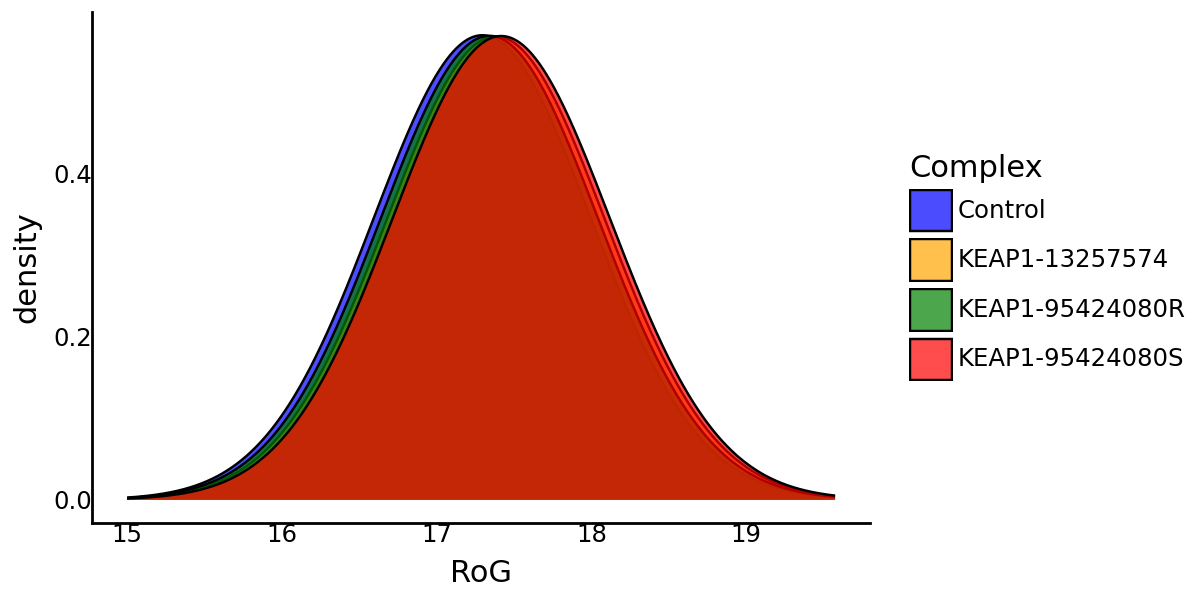

In [ ]:
display(p)

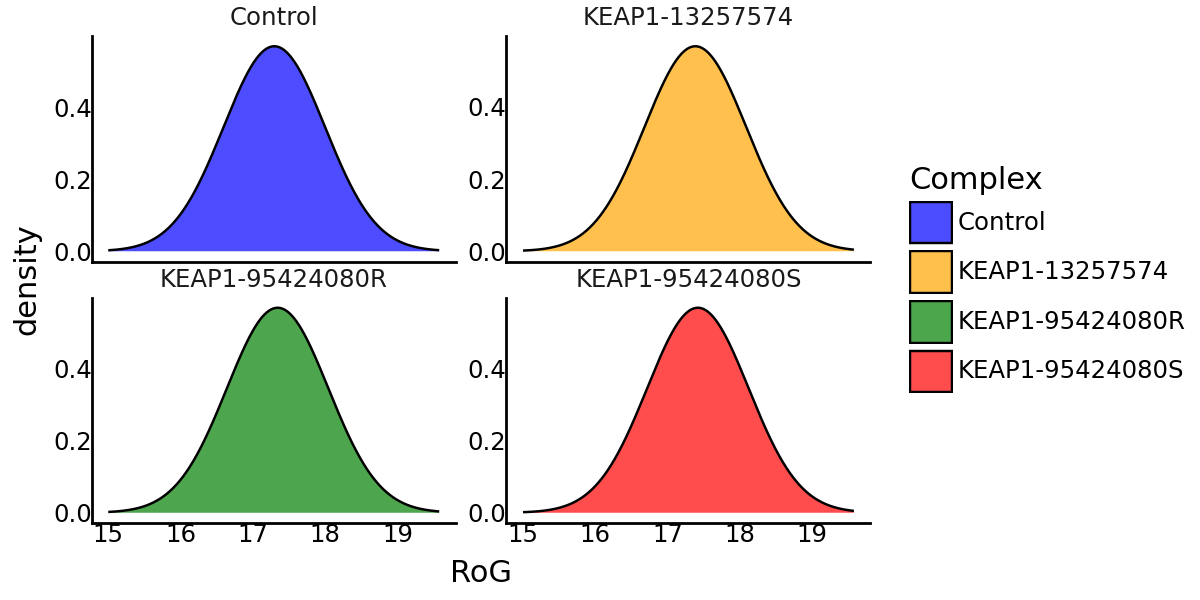

In [ ]:
p = ggplot(combined_data, aes(x='RoG', fill='Complex')) + \
    geom_density(alpha=0.7, bw=0.7) + \
    scale_fill_manual(values=custom_colors) + \
    facet_wrap('~Complex', scales='free_y') + \
    theme_minimal() + \
    theme(
        figure_size=(6, 3),
        panel_background=element_rect(fill='white'),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        axis_line=element_line(color='black'),
        panel_border=element_blank(),
        axis_text=element_text(color='black'),
        axis_title=element_text(color='black')
    ) + \
    xlim(15, combined_data['RoG'].max() + 2)

display(p)


**With Mean-lines**

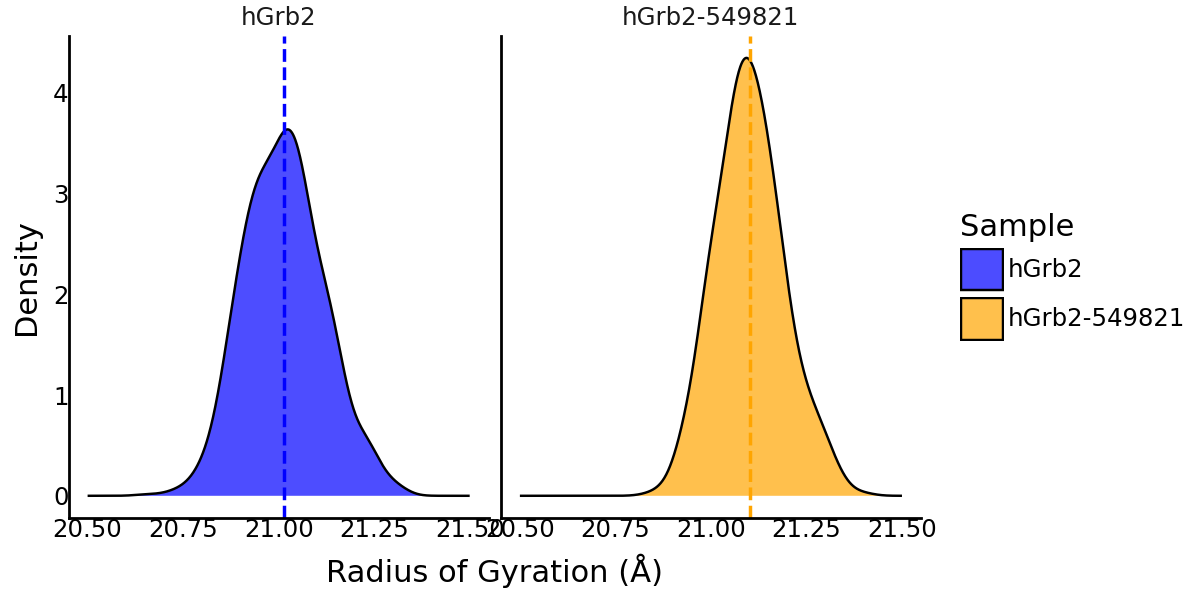

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 3 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: 3wa4_RoG-density.png


In [97]:
from plotnine import *
import pandas as pd

# Calculate mean RoG for each complex
mean_lines = combined_data.groupby('Sample', as_index=False)['RoG (Å)'].mean()

# Density plot with mean lines
p = ggplot(combined_data, aes(x='RoG (Å)', fill='Sample')) + \
    geom_density(alpha=0.7, bw=0.03) + \
    geom_vline(mean_lines, aes(xintercept='RoG (Å)', color='Sample'), linetype='dashed', size=0.7, show_legend=False) + \
    scale_fill_manual(values=custom_colors) + \
    scale_color_manual(values=custom_colors) + \
    facet_wrap('~Sample', scales='fixed') + \
    theme_minimal() + \
    theme(
        figure_size=(6, 3),
        panel_background=element_rect(fill='white'),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        axis_line=element_line(color='black'),
        panel_border=element_blank(),
        axis_text=element_text(color='black'),
        axis_title=element_text(color='black')
    ) + \
    xlim(20.5, 21.5) + \
    labs(x='Radius of Gyration (Å)', y='Density')

display(p)
p.save(filename = '3wa4_RoG-density.png', height=3, width=8, units = 'in', dpi=1200)


**Box plot version**

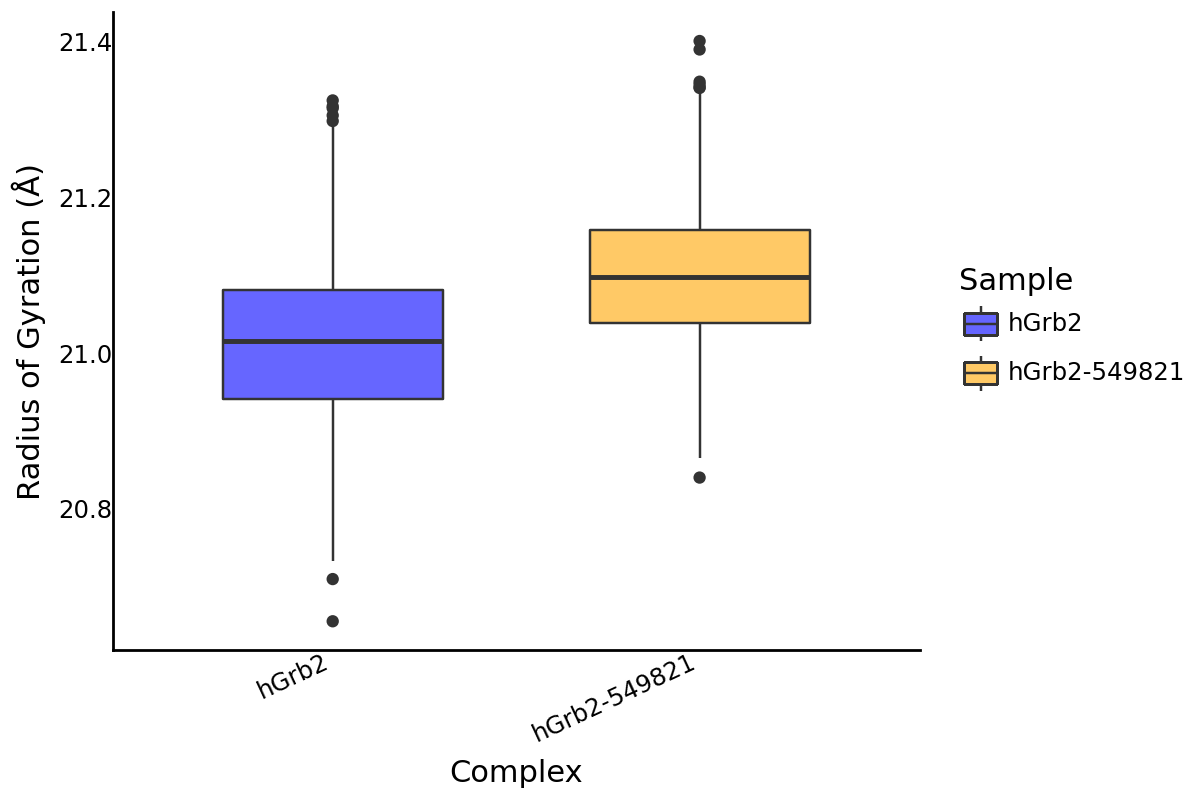

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 7 x 3 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: 3wa4_RoG-boxplot.png


In [99]:
p = ggplot(combined_data, aes(x='Sample', y='RoG (Å)', fill='Sample')) + \
    geom_boxplot(alpha=0.6, width=0.6) + \
    scale_fill_manual(values=custom_colors) + \
    theme_minimal() + \
    theme(
        figure_size=(6, 4),
        axis_text_x=element_text(rotation=25, hjust=1),
        panel_background=element_rect(fill='white'),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        axis_line=element_line(color='black'),
        panel_border=element_blank(),
        axis_text=element_text(color='black'),
        axis_title=element_text(color='black')
    ) + \
    labs(x='Complex', y='Radius of Gyration (Å)')

display(p)
p.save(filename = '3wa4_RoG-boxplot.png', height=3, width=7, units = 'in', dpi=1200)


**Violin Plot version**

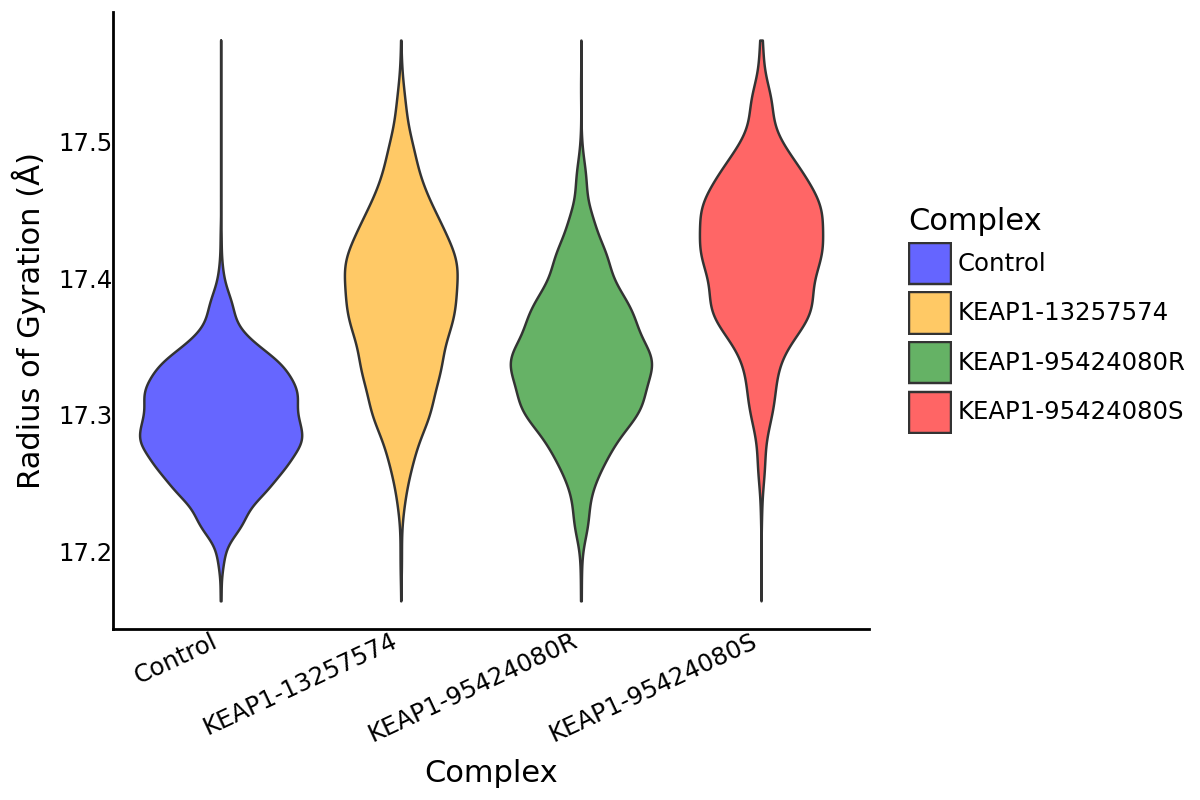

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 3 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: RoG-violin.png


In [ ]:
p = ggplot(combined_data, aes(x='Complex', y='RoG', fill='Complex')) + \
    geom_violin(alpha=0.6, trim=False) + \
    scale_fill_manual(values=custom_colors) + \
    theme_minimal() + \
    theme(
        figure_size=(6, 4),
        axis_text_x=element_text(rotation=25, hjust=1),
        panel_background=element_rect(fill='white'),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        axis_line=element_line(color='black'),
        panel_border=element_blank(),
        axis_text=element_text(color='black'),
        axis_title=element_text(color='black')
    ) + \
    labs(x='Complex', y='Radius of Gyration (Å)')

display(p)
p.save(filename = 'RoG-violin.png', height=3, width=8, units = 'in', dpi=1200)


In [ ]:
p = ggplot(combined_data, aes(x='RoG', fill='Complex')) + \
    geom_density(alpha=0.7, bw=0.7, position='stack') + \
    scale_fill_manual(values=custom_colors) + \
    theme_minimal() + \
    theme(
        figure_size=(6, 3),
        panel_background=element_rect(fill='white'),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        axis_line=element_line(color='black'),
        panel_border=element_blank(),
        axis_text=element_text(color='black'),
        axis_title=element_text(color='black')
    ) + \
    xlim(18, combined_data['RoG'].max() + 2)
display(p)

In [ ]:
p.save(filename = 'RoG.png', height=3, width=8, units = 'in', dpi=600)

**Congratulation!**

You have plot your data and save it with high resolution (600 dpi). You can download your data from the file menu located on the left side.